<a href="https://colab.research.google.com/github/Malcuthrad/FlightDelayHackathonOne/blob/main/Regresion_Logica_Test_FlightOnTime.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Suprimir warnings innecesarios
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas
pd.set_option('display.max_rows', 100)      # Limitar filas mostradas

In [3]:
df = pd.read_csv('vuelos_etl_flightontime.csv')

In [4]:
df.head()

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT,DAY_OF_WEEK,DEP_HOUR,DELAYED
0,2019-09-01,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",1155,1151.0,-4.0,19.0,1210.0,1443.0,4.0,1501,1447.0,-14.0,0,DESCONOCIDO,0,186.0,176.0,153.0,1065,0.0,0.0,0.0,0.0,0.0,6,11,0
1,1900-01-01,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",2120,2114.0,-6.0,9.0,2123.0,2232.0,38.0,2315,2310.0,-5.0,0,DESCONOCIDO,0,235.0,236.0,189.0,1399,0.0,0.0,0.0,0.0,0.0,0,21,0
2,1900-01-01,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",954,1000.0,6.0,20.0,1020.0,1247.0,5.0,1252,1252.0,0.0,0,DESCONOCIDO,0,118.0,112.0,87.0,680,0.0,0.0,0.0,0.0,0.0,0,9,1
3,2023-06-03,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",1609,1608.0,-1.0,27.0,1635.0,1844.0,9.0,1829,1853.0,24.0,0,DESCONOCIDO,0,260.0,285.0,249.0,1589,0.0,0.0,24.0,0.0,0.0,5,16,0
4,1900-01-01,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",1840,1838.0,-2.0,15.0,1853.0,2026.0,14.0,2041,2040.0,-1.0,0,DESCONOCIDO,0,181.0,182.0,153.0,985,0.0,0.0,0.0,0.0,0.0,0,18,0


In [5]:
df.sample(n=8)

,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT,DAY_OF_WEEK,DEP_HOUR,DELAYED
747982,1900-01-01,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1614,OMA,"Omaha, NE",ATL,"Atlanta, GA",1112,1105.0,-7.0,15.0,1120.0,1400.0,7.0,1419,1407.0,-12.0,0,DESCONOCIDO,0,127.0,122.0,100.0,821,0.0,0.0,0.0,0.0,0.0,0,11,0
231682,2021-11-10,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,2400,DFW,"Dallas/Fort Worth, TX",TUL,"Tulsa, OK",1830,0.0,0.0,0.0,0.0,0.0,0.0,1936,0.0,0.0,1,A,0,66.0,0.0,0.0,237,0.0,0.0,0.0,0.0,0.0,2,18,0
112476,2022-12-01,JetBlue Airways,JetBlue Airways: B6,B6,20409,487,BOS,"Boston, MA",LAX,"Los Angeles, CA",850,840.0,-10.0,45.0,925.0,1217.0,11.0,1233,1228.0,-5.0,0,DESCONOCIDO,0,403.0,408.0,352.0,2611,0.0,0.0,0.0,0.0,0.0,3,8,0
874107,1900-01-01,SkyWest Airlines Inc.,SkyWest Airlines Inc.: OO,OO,20304,5672,ORD,"Chicago, IL",BGR,"Bangor, ME",930,1037.0,67.0,17.0,1054.0,1356.0,4.0,1306,1400.0,54.0,0,DESCONOCIDO,0,156.0,143.0,122.0,978,54.0,0.0,0.0,0.0,0.0,0,9,1
33919,1900-01-01,American Airlines Inc.,American Airlines Inc.: AA,AA,19805,1315,LGA,"New York, NY",MIA,"Miami, FL",1211,1209.0,-2.0,75.0,1324.0,1603.0,7.0,1536,1610.0,34.0,0,DESCONOCIDO,0,205.0,241.0,159.0,1096,0.0,0.0,34.0,0.0,0.0,0,12,0
188904,2023-04-07,SkyWest Airlines Inc.,SkyWest Airlines Inc.: OO,OO,20304,4107,LAX,"Los Angeles, CA",SMF,"Sacramento, CA",1416,1413.0,-3.0,9.0,1422.0,1526.0,3.0,1540,1529.0,-11.0,0,DESCONOCIDO,0,84.0,76.0,64.0,373,0.0,0.0,0.0,0.0,0.0,4,14,0
557948,2023-07-05,Republic Airline,Republic Airline: YX,YX,20452,4570,IND,"Indianapolis, IN",JFK,"New York, NY",832,835.0,3.0,11.0,846.0,1029.0,14.0,1045,1043.0,-2.0,0,DESCONOCIDO,0,133.0,128.0,103.0,665,0.0,0.0,0.0,0.0,0.0,2,8,1
822480,1900-01-01,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,331,HNL,"Honolulu, HI",LAX,"Los Angeles, CA",2035,2032.0,-3.0,14.0,2046.0,437.0,17.0,500,454.0,-6.0,0,DESCONOCIDO,0,325.0,322.0,291.0,2556,0.0,0.0,0.0,0.0,0.0,0,20,0


In [6]:
df.shape

(1048575, 35)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 35 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   FL_DATE                  1048575 non-null  object 
 1   AIRLINE                  1048575 non-null  object 
 2   AIRLINE_DOT              1048575 non-null  object 
 3   AIRLINE_CODE             1048575 non-null  object 
 4   DOT_CODE                 1048575 non-null  int64  
 5   FL_NUMBER                1048575 non-null  int64  
 6   ORIGIN                   1048575 non-null  object 
 7   ORIGIN_CITY              1048575 non-null  object 
 8   DEST                     1048575 non-null  object 
 9   DEST_CITY                1048575 non-null  object 
 10  CRS_DEP_TIME             1048575 non-null  int64  
 11  DEP_TIME                 1048575 non-null  float64
 12  DEP_DELAY                1048575 non-null  float64
 13  TAXI_OUT                 1048575 non-null 

In [8]:
df_clean = df.drop(columns=['AIRLINE', 'AIRLINE_DOT', 'ORIGIN_CITY', 'DEST_CITY'])

In [9]:
df_clean.head()

,FL_DATE,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT,DAY_OF_WEEK,DEP_HOUR,DELAYED
0,2019-09-01,UA,19977,1562,FLL,EWR,1155,1151.0,-4.0,19.0,1210.0,1443.0,4.0,1501,1447.0,-14.0,0,DESCONOCIDO,0,186.0,176.0,153.0,1065,0.0,0.0,0.0,0.0,0.0,6,11,0
1,1900-01-01,DL,19790,1149,MSP,SEA,2120,2114.0,-6.0,9.0,2123.0,2232.0,38.0,2315,2310.0,-5.0,0,DESCONOCIDO,0,235.0,236.0,189.0,1399,0.0,0.0,0.0,0.0,0.0,0,21,0
2,1900-01-01,UA,19977,459,DEN,MSP,954,1000.0,6.0,20.0,1020.0,1247.0,5.0,1252,1252.0,0.0,0,DESCONOCIDO,0,118.0,112.0,87.0,680,0.0,0.0,0.0,0.0,0.0,0,9,1
3,2023-06-03,DL,19790,2295,MSP,SFO,1609,1608.0,-1.0,27.0,1635.0,1844.0,9.0,1829,1853.0,24.0,0,DESCONOCIDO,0,260.0,285.0,249.0,1589,0.0,0.0,24.0,0.0,0.0,5,16,0
4,1900-01-01,NK,20416,407,MCO,DFW,1840,1838.0,-2.0,15.0,1853.0,2026.0,14.0,2041,2040.0,-1.0,0,DESCONOCIDO,0,181.0,182.0,153.0,985,0.0,0.0,0.0,0.0,0.0,0,18,0


In [11]:
conteo_registros = df.groupby('FL_DATE').size()
print(conteo_registros)

FL_DATE
1900-01-01    637154
2019-01-01       602
2019-01-02       727
2019-01-03       744
2019-01-04       730
               ...  
2023-12-04       675
2023-12-05       724
2023-12-06       733
2023-12-07       711
2023-12-08       628
Length: 673, dtype: int64


In [12]:
# date_to_drop = '1900-01-01'

# dflimpio = df[df['FL_DATE'] != date_to_drop]

In [11]:
# conteo_registros = df_clean.groupby('FL_DATE').size()
# print(conteo_registros)

In [12]:
df_clean["FL_DATE"] = pd.to_datetime(df_clean["FL_DATE"])

In [13]:
df_clean["DEP_MINUTE"] = df_clean["CRS_DEP_TIME"] % 100

In [14]:
df_clean["DELAYED"].value_counts(normalize=True)

,proportion
DELAYED,
0,0.667852
1,0.332148


In [15]:
# 1. Get a list of the column names
cols = list(df_clean.columns)

# 2. Swap the last two elements in the list
# -1 is the last column, -2 is the second to last
cols[-1], cols[-2] = cols[-2], cols[-1]

# 3. Reorder the dataframe
df_clean = df_clean[cols]

df_clean.head()

,FL_DATE,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,CANCELLED,CANCELLATION_CODE,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT,DAY_OF_WEEK,DEP_HOUR,DEP_MINUTE,DELAYED
0,2019-09-01,UA,19977,1562,FLL,EWR,1155,1151.0,-4.0,19.0,1210.0,1443.0,4.0,1501,1447.0,-14.0,0,DESCONOCIDO,0,186.0,176.0,153.0,1065,0.0,0.0,0.0,0.0,0.0,6,11,55,0
1,1900-01-01,DL,19790,1149,MSP,SEA,2120,2114.0,-6.0,9.0,2123.0,2232.0,38.0,2315,2310.0,-5.0,0,DESCONOCIDO,0,235.0,236.0,189.0,1399,0.0,0.0,0.0,0.0,0.0,0,21,20,0
2,1900-01-01,UA,19977,459,DEN,MSP,954,1000.0,6.0,20.0,1020.0,1247.0,5.0,1252,1252.0,0.0,0,DESCONOCIDO,0,118.0,112.0,87.0,680,0.0,0.0,0.0,0.0,0.0,0,9,54,1
3,2023-06-03,DL,19790,2295,MSP,SFO,1609,1608.0,-1.0,27.0,1635.0,1844.0,9.0,1829,1853.0,24.0,0,DESCONOCIDO,0,260.0,285.0,249.0,1589,0.0,0.0,24.0,0.0,0.0,5,16,9,0
4,1900-01-01,NK,20416,407,MCO,DFW,1840,1838.0,-2.0,15.0,1853.0,2026.0,14.0,2041,2040.0,-1.0,0,DESCONOCIDO,0,181.0,182.0,153.0,985,0.0,0.0,0.0,0.0,0.0,0,18,40,0


# Distribución de la variable objetivo (Target)

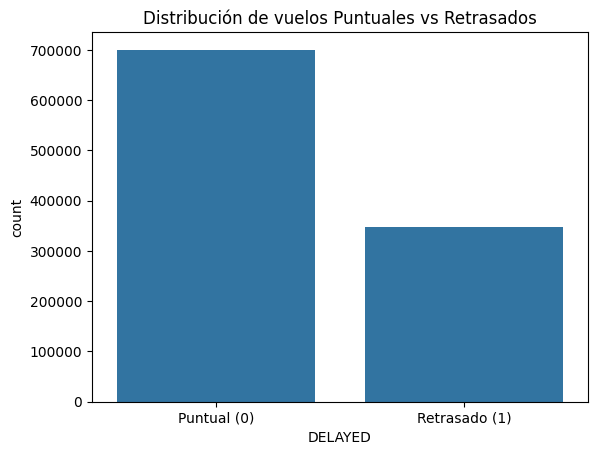

In [16]:
sns.countplot(data=df_clean, x="DELAYED")
plt.title("Distribución de vuelos Puntuales vs Retrasados")
plt.xticks([0, 1], ["Puntual (0)", "Retrasado (1)"])
plt.show()

# Retrasos por hora de salida

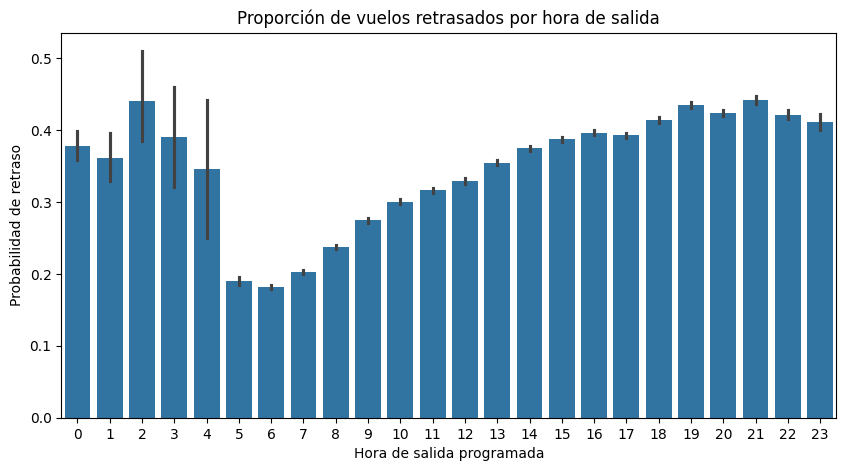

In [17]:
plt.figure(figsize=(10,5))
sns.barplot(
    data=df_clean,
    x="DEP_HOUR",
    y="DELAYED",
    estimator=np.mean
)
plt.title("Proporción de vuelos retrasados por hora de salida")
plt.ylabel("Probabilidad de retraso")
plt.xlabel("Hora de salida programada")
plt.show()

# Retrasos por día de la semana

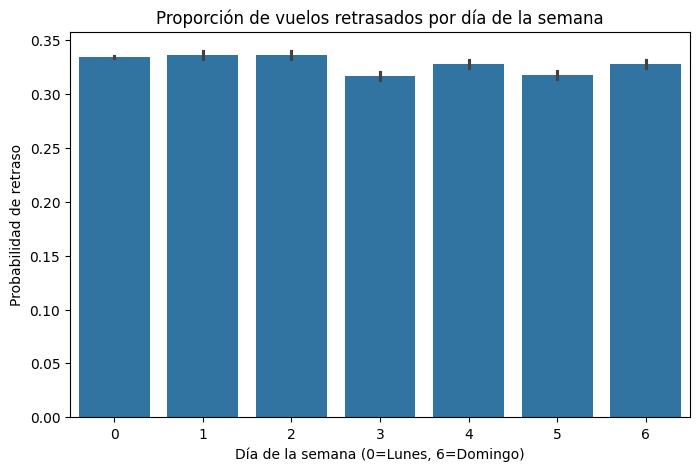

In [22]:
plt.figure(figsize=(8,5))
sns.barplot(
    data=df_clean,
    x="DAY_OF_WEEK",
    y="DELAYED",
    estimator=np.mean
)
plt.title("Proporción de vuelos retrasados por día de la semana")
plt.xlabel("Día de la semana (0=Lunes, 6=Domingo)")
plt.ylabel("Probabilidad de retraso")
plt.show()


# Retrasos por aerolínea

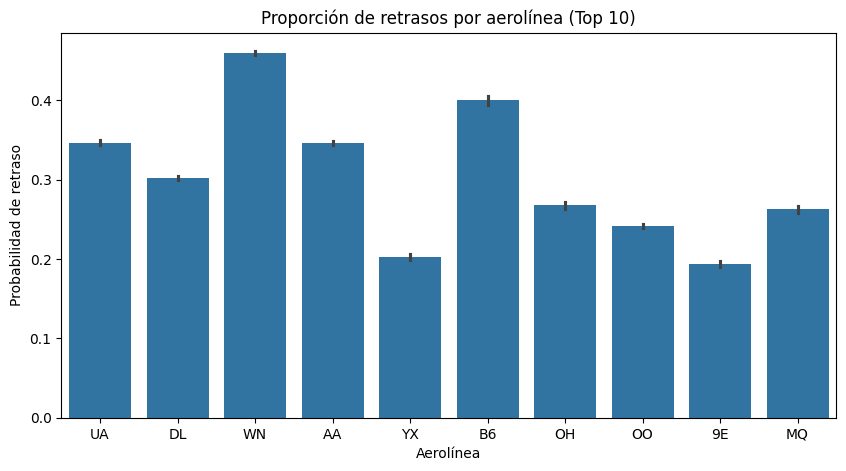

In [19]:
top_carriers = (
    df_clean["AIRLINE_CODE"]
    .value_counts()
    .head(10)
    .index
)

df_carriers = df_clean[df_clean["AIRLINE_CODE"].isin(top_carriers)]

plt.figure(figsize=(10,5))
sns.barplot(
    data=df_carriers,
    x="AIRLINE_CODE",
    y="DELAYED",
    estimator=np.mean
)
plt.title("Proporción de retrasos por aerolínea (Top 10)")
plt.ylabel("Probabilidad de retraso")
plt.xlabel("Aerolínea")
plt.show()

# Distancia del vuelo vs retraso

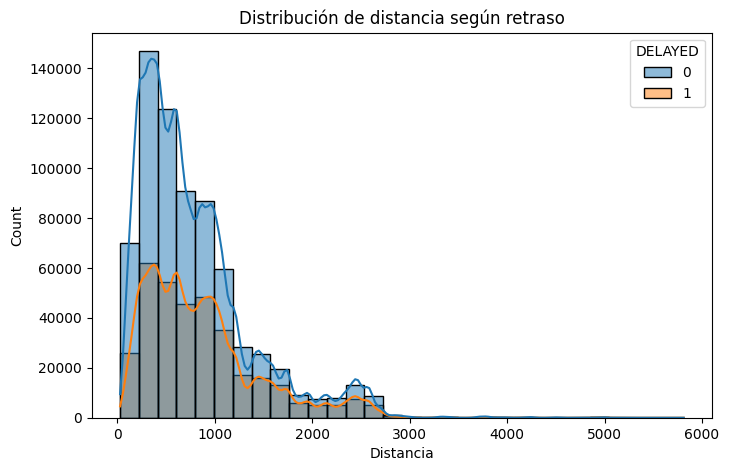

In [21]:
plt.figure(figsize=(8,5))
sns.histplot(
    data=df_clean,
    x="DISTANCE",
    hue="DELAYED",
    bins=30,
    kde=True
)
plt.title("Distribución de distancia según retraso")
plt.xlabel("Distancia")
plt.show()

# Aeropuertos con mayor tasa de retrasos (origen)

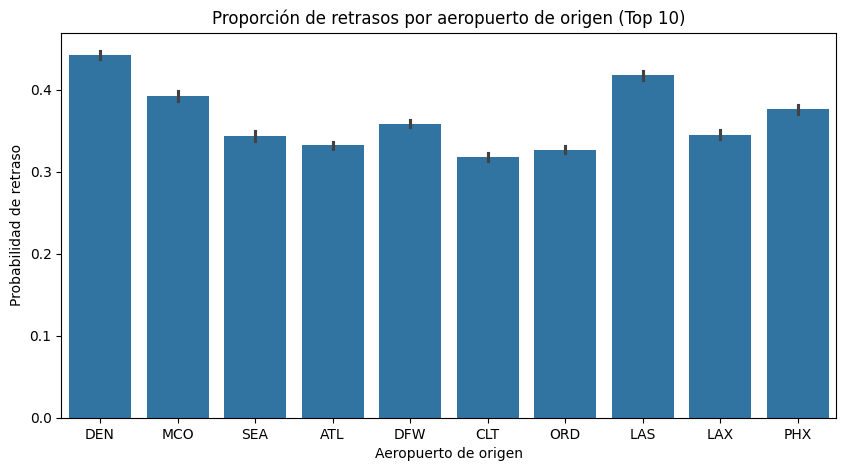

In [25]:
top_origins = (
    df_clean["ORIGIN"]
    .value_counts()
    .head(10)
    .index
)

df_origins = df_clean[df_clean["ORIGIN"].isin(top_origins)]

plt.figure(figsize=(10,5))
sns.barplot(
    data=df_origins,
    x="ORIGIN",
    y="DELAYED",
    estimator=np.mean
)
plt.title("Proporción de retrasos por aeropuerto de origen (Top 10)")
plt.ylabel("Probabilidad de retraso")
plt.xlabel("Aeropuerto de origen")
plt.show()

# Feature Engineering + Encoding

## Separar variables predictoras y target

In [27]:
X = df_clean.drop(columns="DELAYED")
y = df_clean["DELAYED"]

## Identificar tipos de variables

In [28]:
categorical_features = [
    "AIRLINE_CODE",
    "ORIGIN",
    "DEST"
]

numerical_features = [
    "DAY_OF_WEEK",
    "DEP_HOUR",
    "DISTANCE"
]

# Definición el preprocesamiento (ColumnTransformer)

In [26]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [29]:
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ]
)

# Entrenar modelo (Regresión Logística)

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

## Creamos pipeline completo

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [33]:
model = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("classifier", LogisticRegression(
            max_iter=1000,
            class_weight="balanced"
        ))
    ]
)

In [34]:
# Entrenar modelo

model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['DAY_OF_WEEK', 'DEP_HOUR',
                                                   'DISTANCE']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['AIRLINE_CODE', 'ORIGIN',
                                                   'DEST'])])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=1000))])

In [35]:
# Predicciones

y_pred = model.predict(X_test)

## Métricas de evaluación

In [36]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    classification_report
)

In [39]:
print(f"Accuracy: {accuracy_score(y_test, y_pred):.3f}")
print(f"Precision: {precision_score(y_test, y_pred):.3f}")
print(f"Recall: {recall_score(y_test, y_pred):.3f}")
print(f"F1-score: {f1_score(y_test, y_pred):.3f}")

Accuracy: 0.615
Precision: 0.442
Recall: 0.608
F1-score: 0.512


In [40]:
# Reporte
print(classification_report(
    y_test,
    y_pred,
    target_names=["Puntual", "Retrasado"]
))

              precision    recall  f1-score   support

     Puntual       0.76      0.62      0.68    140059
   Retrasado       0.44      0.61      0.51     69656

    accuracy                           0.61    209715
   macro avg       0.60      0.61      0.60    209715
weighted avg       0.65      0.61      0.63    209715

